In [11]:
import pandas as pd 
import matplotlib.pyplot as plt


In [12]:
df= pd.read_csv("Student Mental Health Analysis During Online Learning.csv")

In [13]:
df.head()

,Name,Gender,Age,Education Level,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week),Stress Level,Anxious Before Exams,Academic Performance Change
0,Aarav,Male,15,Class 8,7.1,8.9,9.3,Medium,No,Same
1,Meera,Female,25,MSc,3.3,5.0,0.2,Medium,No,Same
2,Ishaan,Male,20,BTech,9.5,5.4,6.2,Medium,No,Same
3,Aditya,Male,20,BA,10.8,5.6,5.5,High,Yes,Same
4,Anika,Female,17,Class 11,2.8,5.4,3.1,Medium,Yes,Same


In [14]:
df.shape

(1000, 10)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          1000 non-null   object 
 1   Gender                        1000 non-null   object 
 2   Age                           1000 non-null   int64  
 3   Education Level               1000 non-null   object 
 4   Screen Time (hrs/day)         1000 non-null   float64
 5   Sleep Duration (hrs)          1000 non-null   float64
 6   Physical Activity (hrs/week)  1000 non-null   float64
 7   Stress Level                  1000 non-null   object 
 8   Anxious Before Exams          1000 non-null   object 
 9   Academic Performance Change   1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.3+ KB


In [16]:
df.isnull().sum()

Name                            0
Gender                          0
Age                             0
Education Level                 0
Screen Time (hrs/day)           0
Sleep Duration (hrs)            0
Physical Activity (hrs/week)    0
Stress Level                    0
Anxious Before Exams            0
Academic Performance Change     0
dtype: int64

In [17]:
(df==" ").sum()

Name                            0
Gender                          0
Age                             0
Education Level                 0
Screen Time (hrs/day)           0
Sleep Duration (hrs)            0
Physical Activity (hrs/week)    0
Stress Level                    0
Anxious Before Exams            0
Academic Performance Change     0
dtype: int64

In [9]:
df.describe()

,Age,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week)
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.342000,6.909200,6.450800,5.017600
std,3.459914,2.907106,1.466407,2.930344
min,15.000000,2.000000,4.000000,0.000000
25%,17.000000,4.400000,5.100000,2.600000
50%,20.000000,6.900000,6.500000,5.000000
75%,23.000000,9.500000,7.700000,7.600000
max,26.000000,12.000000,9.000000,10.000000


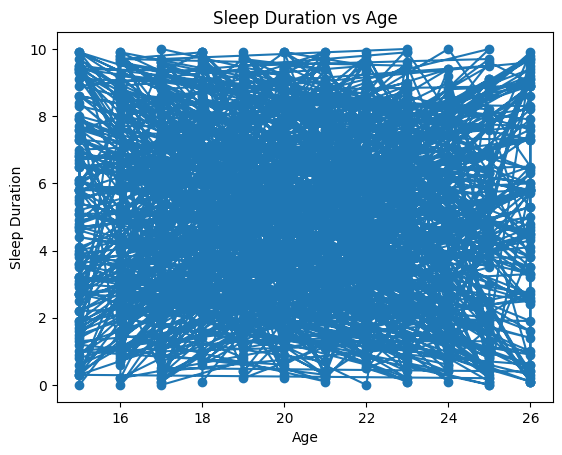

In [28]:
plt.plot(df['Age'], df['Physical Activity (hrs/week)'], marker='o')
plt.title('Sleep Duration vs Age')
plt.xlabel('Age')
plt.ylabel('Sleep Duration')
plt.show()

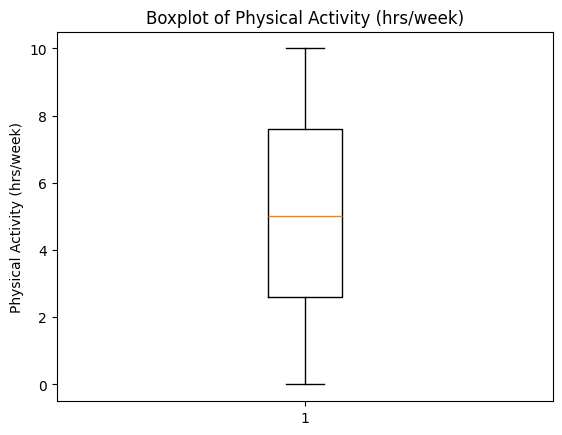

In [29]:
plt.boxplot(df['Physical Activity (hrs/week)'])
plt.title('Boxplot of Physical Activity (hrs/week)')
plt.ylabel('Physical Activity (hrs/week)')
plt.show()

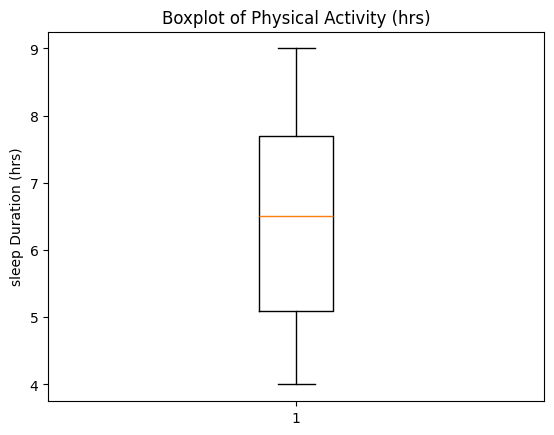

In [34]:
plt.boxplot(df['Sleep Duration (hrs)'])
plt.title('Boxplot of Physical Activity (hrs)')
plt.ylabel('sleep Duration (hrs)')
plt.show()

In [35]:
df.to_csv('cleaned_data.csv', index=False)

In [36]:
%pip install catboost



   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 1.0/102.5 MB 7.2 MB/s eta 0:00:15
    --------------------------------------- 1.6/102.5 MB 4.0 MB/s eta 0:00:26
    --------------------------------------- 2.4/102.5 MB 4.1 MB/s eta 0:00:25
   - -------------------------------------- 2.9/102.5 MB 3.5 MB/s eta 0:00:29
   - -------------------------------------- 3.4/102.5 MB 3.3 MB/s eta 0:00:31
   - -------------------------------------- 3.9/102.5 MB 3.3 MB/s eta 0:00:31
   - -------------------------------------- 5.0/102.5 MB 3.4 MB/s eta 0:00:29
   -- ------------------------------------- 5.8/102.5 MB 3.4 MB/s eta 0:00:29
   -- ------------------------------------- 6.6/102.5 MB 3.4 MB/s eta 0:00:29
   -- ------------------------------------- 7.1/102.5 MB 3.4 MB/s eta 0:00:29
   --- ------------------------------------ 8.1/102.5 MB 3.4 MB/s eta 0:00:28
   --- ------------------------------------ 8.9/102.5 MB 3.5 MB/s eta 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
# ============================
# CatBoost Classifier Training
# ============================
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Load and prepare data
df = pd.read_csv("Student Mental Health Analysis During Online Learning.csv")
df.drop(columns=["Name"], inplace=True)

cat_cols = ["Gender", "Education Level", "Anxious Before Exams", "Academic Performance Change"]
target = "Stress Level"
X = df.drop(columns=[target])
y = df[target]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# CatBoost Pool
train_pool = Pool(X_train, y_train, cat_features=cat_cols)
val_pool = Pool(X_val, y_val, cat_features=cat_cols)

# Train CatBoost
cat_model = CatBoostClassifier(iterations=300, learning_rate=0.05, depth=6, auto_class_weights='Balanced', verbose=100)
cat_model.fit(train_pool, eval_set=val_pool)

# Predictions and Evaluation
cat_preds = cat_model.predict(X_val)
print("CatBoost Classification Report:\n", classification_report(y_val, cat_preds))

# Save predictions for comparison
pd.DataFrame({"Actual": y_val, "CatBoost_Pred": cat_preds.flatten()}).to_csv("catboost_predictions.csv", index=False)


0:	learn: 1.0976939	test: 1.0985659	best: 1.0985659 (0)	total: 55.5ms	remaining: 16.6s
100:	learn: 0.9743170	test: 1.1016388	best: 1.0956290 (50)	total: 5.48s	remaining: 10.8s
200:	learn: 0.8353050	test: 1.1137000	best: 1.0956290 (50)	total: 11.1s	remaining: 5.48s
299:	learn: 0.6965934	test: 1.1073504	best: 1.0956290 (50)	total: 18s	remaining: 0us

bestTest = 1.09562903
bestIteration = 50

Shrink model to first 51 iterations.
CatBoost Classification Report:
               precision    recall  f1-score   support

        High       0.30      0.33      0.32        36
         Low       0.32      0.44      0.37        66
      Medium       0.44      0.32      0.37        98

    accuracy                           0.36       200
   macro avg       0.36      0.36      0.35       200
weighted avg       0.38      0.36      0.36       200



In [42]:
# ===========================
# LightGBM Classifier Training
# ===========================
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Load and encode data
df = pd.read_csv("Student Mental Health Analysis During Online Learning.csv")
df.drop(columns=["Name"], inplace=True)

cat_cols = ["Gender", "Education Level", "Anxious Before Exams", "Academic Performance Change"]
target = "Stress Level"

# Encode categorical variables
label_encoders = {}
for col in cat_cols + [target]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=[target])
y = df[target]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train LightGBM
lgb_model = lgb.LGBMClassifier(n_estimators=300, learning_rate=0.05, max_depth=6, class_weight='balanced', random_state=42)
lgb_model.fit(X_train, y_train)

# Predictions and Evaluation
lgb_preds = lgb_model.predict(X_val)
print("LightGBM Classification Report:\n", classification_report(y_val, lgb_preds))

# Save predictions for comparison
lgb_preds_decoded = label_encoders[target].inverse_transform(lgb_preds)
y_val_decoded = label_encoders[target].inverse_transform(y_val)
pd.DataFrame({"Actual": y_val_decoded, "LightGBM_Pred": lgb_preds_decoded}).to_csv("lightgbm_predictions.csv", index=False)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000481 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 284
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 8
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

In [40]:
%pip install lightgbm


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------- ----------- 1.0/1.5 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

CatBoost Accuracy: 0.3600
LightGBM Accuracy: 0.4050


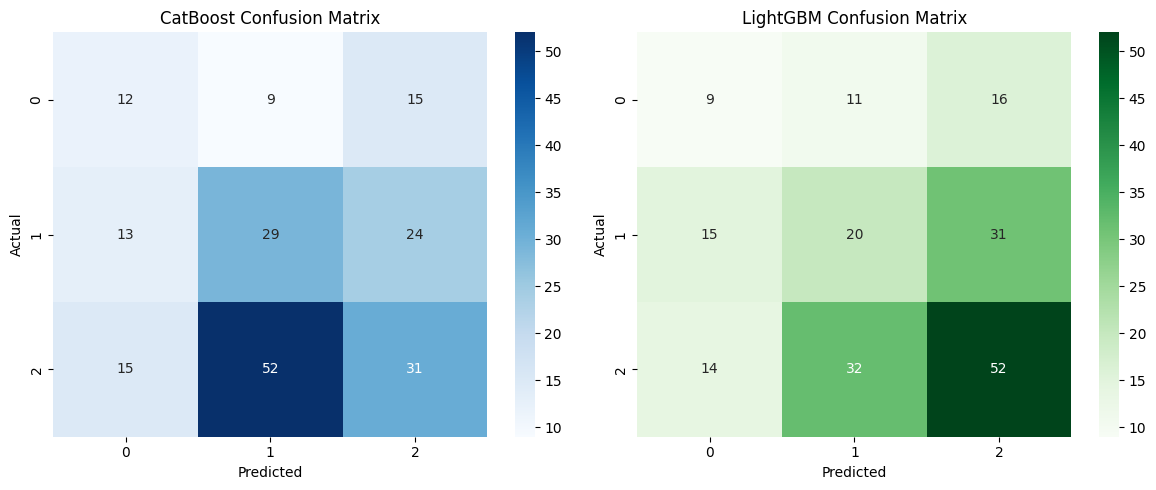

In [44]:
# ============================
# Model Comparison and Plots
# ============================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# Load prediction results
cat_df = pd.read_csv("catboost_predictions.csv")
lgb_df = pd.read_csv("lightgbm_predictions.csv")

# Combine for comparison
comparison_df = cat_df.copy()
comparison_df["LightGBM_Pred"] = lgb_df["LightGBM_Pred"]

# Accuracy scores
cat_acc = accuracy_score(comparison_df["Actual"], comparison_df["CatBoost_Pred"])
lgb_acc = accuracy_score(comparison_df["Actual"], comparison_df["LightGBM_Pred"])
print(f"CatBoost Accuracy: {cat_acc:.4f}")
print(f"LightGBM Accuracy: {lgb_acc:.4f}")

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(comparison_df["Actual"], comparison_df["CatBoost_Pred"]), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("CatBoost Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(comparison_df["Actual"], comparison_df["LightGBM_Pred"]), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("LightGBM Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()
